In [2]:
opened=3;

In [3]:
using Pkg, Revise, Plots, Wavelets, LinearAlgebra, FFTW

In [4]:
wavelet(WT.morl, 4)

CFW{Wavelets.WT.PerBoundary,Float64,Float64}(4.0, 1.0, 1.0676678922979226, 0.7071067811865475, -1, [5.8, 4.956405319172498e-8, 1.0000000000110334], "morl", 2, Mother(), 1.0, Inf)

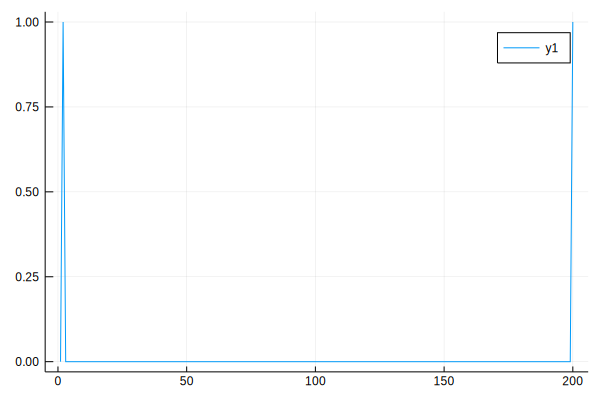

In [5]:
simpleTest = zeros(101); simpleTest[2] = 1;
plot(irfft(simpleTest, 200, 1));
#simpleNon = zeros(200); simpleNon[2] = 1;
#plot(ifft())
plot(real.(fft(irfft(simpleTest, 200, 1))))

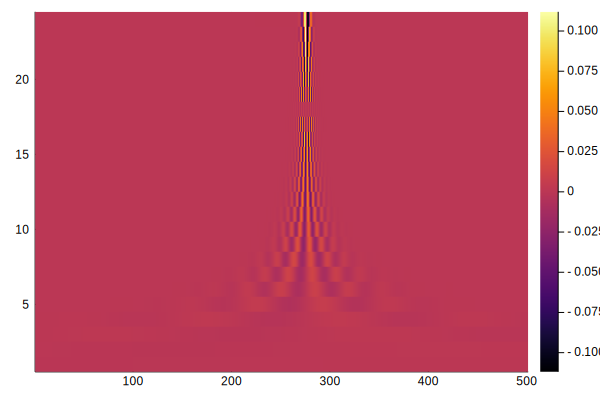

In [32]:
wavelets,ω = computeWavelets(size(x,1), wavelet(WT.morl,8));
plot([wavelets sum(wavelets,dims=2)], labels="",title="there are $(size(wavelets,2)) of them");
zeroPadded = cat(wavelets, zeros(size(x,1),24), dims=1);
heatmap(ifftshift(real.(ifft(zeroPadded, 1)))');
#heatmap(ifftshift(real.(ifft([wavelets], 1)))')
#maximum(abs.(ifft(zeroPadded,1)[:,1]-ifft(zeroPadded[:,1],1)))
#plot(ifftshift(abs.(irfft(wavelets,2*size(x,1)+1,1)),1)[1850:(2500 - 250),end-9])
heatmap(ifftshift(imag.(ifft(wavelets, 1)), 1)[750:1250,:]')

In [301]:
@doc plan_rfft

  plan_rfft(A [, dims]; flags=FFTW.ESTIMATE, timelimit=Inf)

  Pre-plan an optimized real-input FFT, similar to plan_fft except for rfft
  instead of fft. The first two arguments, and the size of the transformed
  result, are the same as for rfft.

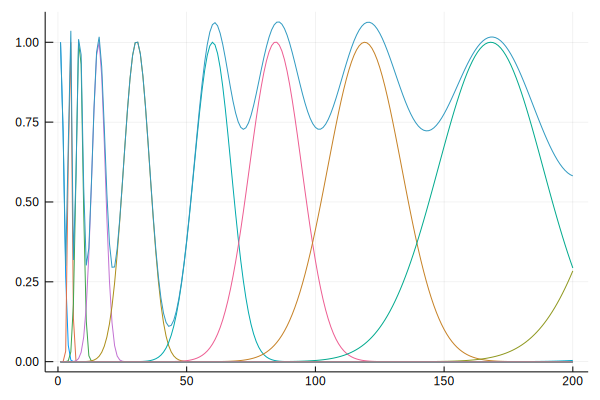

In [33]:
# let's take a close look at the smallest frequency wavelets
plot([wavelets sum(wavelets,dims=2)][1:200,:], labels="")

Now that we have some idea of what the wavelets themselves look like, lets see
how they transform some example signals.

In [42]:
@doc testfunction

  testfunction(n::Int, ft::AbstractString)

  return a vector of test function values on [0,1), see Donoho, D.L.; I.M.
  Johnstone (1994), "Ideal spatial adaptation by wavelet shrinkage,"
  Biometrika, vol. 81, pp. 425–455.

  Options for ft are

    •    Blocks

    •    Bumps

    •    HeaviSine

    •    Doppler

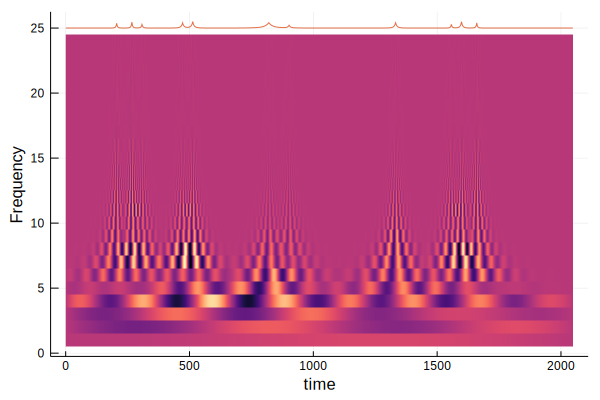

In [129]:
J=11; n = 2^J
x = testfunction(n, "Bumps")# + 0.0*sin.(range(0,200π,length=n));
wavelets, ω = computeWavelets(size(x, 1), wavelet(WT.morl,8));
plot([wavelets sum(wavelets,dims=2)], labels="",title="there are $(size(wavelets,2)) of them")
plot([wavelets abs.(rfft([x; reverse(x,dims=1)]))[1:n] .* norm(wavelets,Inf)./norm(rfft(x),Inf)],labels="");
#heatmap(irfft(wavelets',n,1))
y = cwt(x, wavelet(WT.morl, 8));
heatmap(real.(y)', xlabel="time", ylabel="Frequency", colorbar=false, color=:magma); plot!(x./2/norm(x,Inf) .+ size(y,2) .+ 1,label="");
plot([wavelets abs.(rfft([x; reverse(x,dims=1)]))[1:n] .* norm(wavelets,Inf)./norm(rfft(x),Inf)],labels="");
[size(wavelets), size(sum(wavelets,dims=2)), size(rfft([x; reverse(x,dims=1)[1:end-1]]))]
heatmap(imag.(y)', xlabel="time", ylabel="Frequency", colorbar=false, color=:magma); plot!(x./2/norm(x,Inf) .+ size(y,2) .+ 1,label="")

In [ ]:
y = cwt(x, wavelet(WT.dog1))
heatmap(abs.(y)); plot!(x .+90,label="")

In [ ]:
y = cwt(x, wavelet(WT.paul4))
heatmap(abs.(y)); plot!(x .+90,label="")